In [ ]:
pip install datasets

  Using cached datasets-2.19.1-py3-none-any.whl (542 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 500.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.5 MB/s eta 0:00:00
  Using cached dill-0.3.8-py3-none-any.whl (116 kB)
  Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (194 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3

In [ ]:
from datasets import load_dataset
dataset = load_dataset("dair-ai/emotion")

In [ ]:
train_dataset = dataset["train"]
test_dataset= dataset["test"]
train_X = train_dataset["text"]
train_Y = train_dataset["label"]
test_X = test_dataset["text"]
test_Y = test_dataset["label"]
print(train_X[:5])


['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [ ]:
test_dataset[:5]

{'text': ['im feeling rather rotten so im not very ambitious right now',
  'im updating my blog because i feel shitty',
  'i never make her separate from me because i don t ever want her to feel like i m ashamed with her',
  'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived',
  'i was feeling a little vain when i did this one'],
 'label': [0, 0, 0, 1, 0]}

In [ ]:
import tensorflow as tf
text_tensor = tf.constant(train_dataset['text'])
label_tensor = tf.constant(train_dataset['label'])
text_tensor_test = tf.constant(test_dataset['text'])
label_tensor_test = tf.constant(test_dataset['label'])
train_dataset = tf.data.Dataset.from_tensor_slices((text_tensor, label_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((text_tensor_test, label_tensor_test))

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b'i didnt feel humiliated'
label:  0


In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'i cant do either of these things so i end up trying my hardest to suppress these feelings which makes me irritable and is very tiring'
 b'i did feel scared now'
 b'i feel like being friendly is a chore but without people around me i feel lonely']

labels:  [3 4 1]


In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
import numpy as np
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'i', 'feel', 'and', 'to', 'the', 'a', 'that',
       'feeling', 'of', 'my', 'in', 'it', 'like', 'so', 'for', 'im', 'me',
       'but'], dtype='<U13')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  2, 131,  39, 607,  10, 109,  89,  15,   2, 228,  42, 191,  11,
          1,   5,   1, 109, 115, 108, 151,  18, 413,   4,  22,  46,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  2, 127,   3, 370,  58,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  2,   3,  14,  61, 619,  22,   7,   1,  19, 174,  63, 128,  18,
          2,   3, 364,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]])

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'i cant do either of these things so i end up trying my hardest to suppress these feelings which makes me irritable and is very tiring'
Round-trip:  i cant do either of these things so i end up trying my [UNK] to [UNK] these feelings which makes me irritable and is very [UNK]                    

Original:  b'i did feel scared now'
Round-trip:  i did feel scared now                                         

Original:  b'i feel like being friendly is a chore but without people around me i feel lonely'
Round-trip:  i feel like being friendly is a [UNK] but without people around me i feel lonely                              



In [ ]:
from keras.layers import Dense, SimpleRNN

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
        SimpleRNN(64),  # Change to SimpleRNN
        Dense(64, activation='relu'),
        Dense(6, activation='softmax')  # 6 output classes
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Use SparseCategoricalCrossentropy for multiclass classification
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=test_dataset,
    validation_steps=30
)

Epoch 1/15
250/250 [==============================] - 20s 66ms/step - loss: 1.6233 - accuracy: 0.3347 - val_loss: 1.5684 - val_accuracy: 0.3521
Epoch 2/15
250/250 [==============================] - 15s 61ms/step - loss: 1.5700 - accuracy: 0.3613 - val_loss: 1.5535 - val_accuracy: 0.3734
Epoch 3/15
250/250 [==============================] - 8s 31ms/step - loss: 1.5460 - accuracy: 0.3903 - val_loss: 1.5213 - val_accuracy: 0.4057
Epoch 4/15
250/250 [==============================] - 6s 24ms/step - loss: 1.4266 - accuracy: 0.4697 - val_loss: 1.3329 - val_accuracy: 0.4938
Epoch 5/15
250/250 [==============================] - 8s 30ms/step - loss: 1.1285 - accuracy: 0.6129 - val_loss: 0.9976 - val_accuracy: 0.6682
Epoch 6/15
250/250 [==============================] - 7s 30ms/step - loss: 0.8779 - accuracy: 0.7090 - val_loss: 0.8211 - val_accuracy: 0.7323
Epoch 7/15
250/250 [==============================] - 6s 25ms/step - loss: 0.7306 - accuracy: 0.7552 - val_loss: 0.7260 - val_accuracy: 0.75

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

32/32 [==============================] - 0s 8ms/step - loss: 0.5102 - accuracy: 0.8235
Test Loss: 0.510200023651123
Test Accuracy: 0.8234999775886536


In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 1.683010421693325)

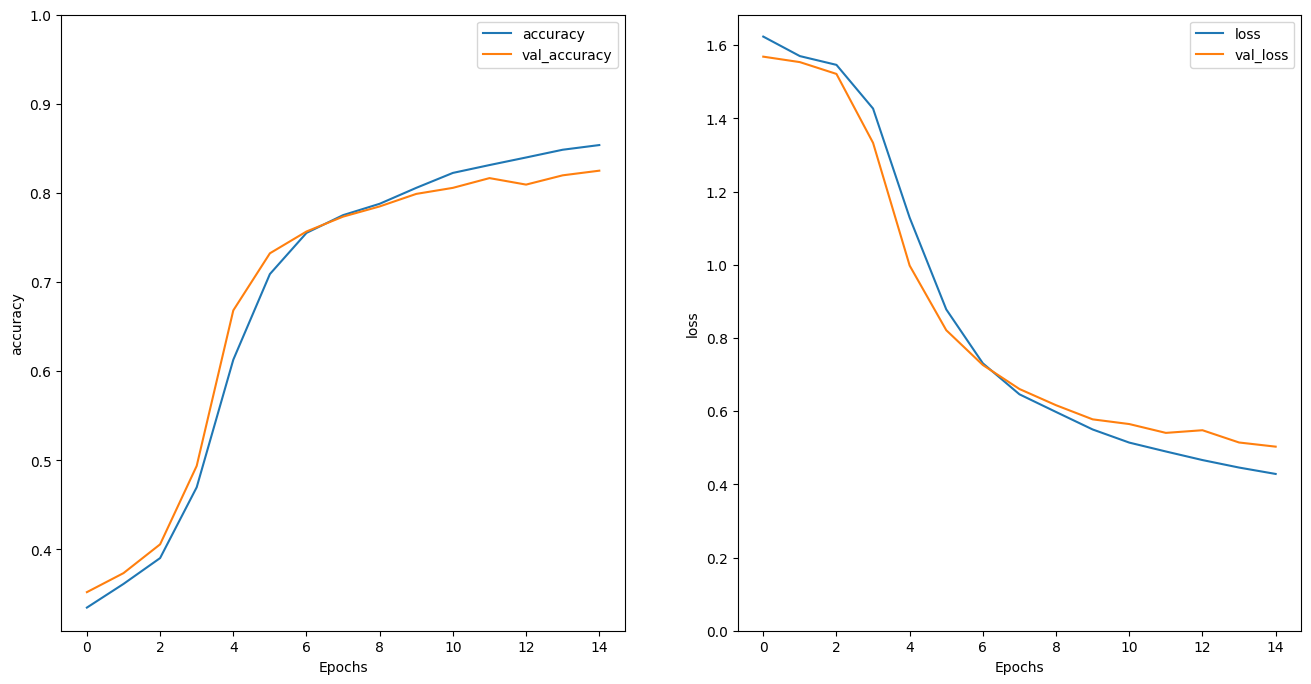

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
label_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']



sample_text = ("I am afraid of every type of bug that i encounter ")
predictions = model.predict(np.array([sample_text]))
# Find the index of the highest probability
print(predictions)
predicted_index = np.argmax(predictions)

# Map the index to the corresponding label name
predicted_label = label_names[predicted_index]
print("Predicted emotion:", predicted_label)


1/1 [==============================] - 0s 23ms/step
[[0.01439862 0.03145525 0.16284461 0.07025301 0.51742345 0.20362507]]
Predicted emotion: fear


In [ ]:
# make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)


63/63 [==============================] - 0s 5ms/step


In [ ]:
predicted_labels_train = np.argmax(train_predict, axis=1)
predicted_labels_test = np.argmax(test_predict, axis = 1)
print("Predicted labels:", predicted_labels_train)

Predicted labels: [0 0 3 ... 1 3 0]


In [ ]:
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions

    train_accuracy = accuracy_score(trainY, train_predict)
    test_accuracy = accuracy_score(testY, test_predict)

    # Calculate precision
    train_precision = precision_score(trainY, train_predict, average='macro')  # You can also use 'micro' or 'weighted'
    test_precision = precision_score(testY, test_predict, average='macro')  # You can also use 'micro' or 'weighted'

    # Calculate recall
    train_recall = recall_score(trainY, train_predict, average='macro')  # You can also use 'micro' or 'weighted'
    test_recall = recall_score(testY, test_predict, average='macro')  # You can also use 'micro' or 'weighted'

    # Calculate F1 score
    train_f1 = f1_score(trainY, train_predict, average='macro')  # You can also use 'micro' or 'weighted'
    test_f1 = f1_score(testY, test_predict, average='macro')  # You can also use 'micro' or 'weighted'

    # Calculate confusion matrix
    train_cm = confusion_matrix(trainY, train_predict)
    test_cm = confusion_matrix(testY, test_predict)
    print("Train Accuracy:", train_accuracy)
    print("Test  Accuracy:", test_accuracy)

    print("Train Precision:", train_precision)
    print("Test Precision:", test_precision)

    print("Train Recall:", train_recall)
    print("Train Recall:", test_recall)

    print("Train F1 Score:", train_f1)
    print("Test F1 Score:", test_f1)

    print("Test Confusion Matrix:\n", test_cm)


In [ ]:
print(train_Y)
print(predicted_labels_train)

In [ ]:
print_error(train_Y, test_Y, predicted_labels_train, predicted_labels_test)

Train Accuracy: 0.8686875
Test  Accuracy: 0.8235
Train Precision: 0.8156989855621295
Test Precision: 0.7010021600976875
Train Recall: 0.7483475410187519
Train Recall: 0.674326410399448
Train F1 Score: 0.7623598973848734
Test F1 Score: 0.6789427476322221
Test Confusion Matrix:
 [[524  30   1  20   4   2]
 [ 13 636  35   3   8   0]
 [  5  48  92   3  10   1]
 [ 24  19   2 214   8   8]
 [  9  12   9  14 175   5]
 [  2   6   3   2  47   6]]
Train RMSE: 0.000 RMSE
Test RMSE: 0.000 RMSE


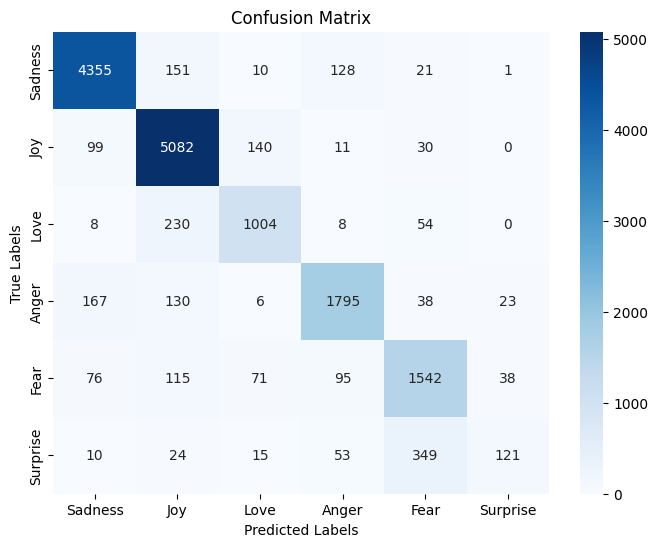

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Define class labels
class_labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']

# Calculate confusion matrix
cm = confusion_matrix(train_Y, predicted_labels_train)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:

model.save('rnn-emotion.h5')
# Or save the model to a TensorFlow SavedModel format
